# Extract Comments


In [1]:
import gzip
import pandas as pd
# import feather
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:
MERGEDTAGSCOMM = 'data/finalgamingtagcomment.parquet'

In [3]:
# COMMENTS = 'DATA/youtube_comments.tsv.gz'
# HELPERMD = 'data/yt_metadata_helper.feather'
# METADATA = 'data/yt_metadata_en.jsonl.gz'
# MERGEDHELPERCOMM = 'data/mergedmetadatacomments.csv'
# METADATAFILTERED = 'data/allmtdt.parquet'

In [4]:
merged_commtags = pd.read_parquet(MERGEDTAGSCOMM)

In [5]:
merged_commtags.head()

,author,display_id,likes,replies,tags,upload_date
0,2,9pQILRT42Cg,0,0,"faze,fazeclan,banks,faze banks,my new girlfrie...",2017-06-22 00:00:00
1,2,PWWRzCyuiFU,0,0,,2018-06-03 00:00:00
2,5,9MuGpmXGlsY,0,0,"fortnite,fortnite gameplay,fortnite gotta chil...",2019-07-13 00:00:00
3,5,UvZPbfUkMGw,0,0,"fortnite,fortnite top 10,top 10 crazy ways peo...",2019-06-17 00:00:00
4,11,qj9sjQjQ19M,0,0,"مقلب ببجي,ببجي موبايل,pubg mobile,مقلب ببجي مو...",2019-02-22 00:00:00


In [6]:

# Define colors for each category
colors = {'call of duty':'black','fifa': 'blue', 'pes': 'green', 'fortnite': 'red', 'league of legends': 'orange', 'minecraft': 'purple'}

frames = {tag: merged_commtags[merged_commtags['tags'].str.contains(tag, case=False)] for tag in tqdm(colors)}

print(frames)

100%|██████████| 6/6 [06:02<00:00, 60.46s/it]


{'call of duty':            author   display_id  likes  replies  \
41             16  P4soUB4N_7Y      0        0   
114            16  9BRuBptSTMk      0        0   
221            16  -D7KM5S4j94      0        0   
249            16  P4soUB4N_7Y      0        0   
259            16  _zLovAyL6YA      2        0   
...           ...          ...    ...      ...   
25658509  6695065  iO923YxI9OA      0        0   
25658639  6695100  GY4cFGgD7U0      0        0   
25658642  6695100  AinJbYHmnJo      0        0   
25658646  6695100  UOOVBatsYzY      1        0   
25658649  6695100  2mIlFC52bqc      0        0   

                                                       tags  \
41        Call of Duty Mobile,Call of Duty on Mobile,COD...   
114       apex legends gameplay,fortnite,battle royale,h...   
221       iferg,HawksNest,NoahFromYoutube,call of duty m...   
249       Call of Duty Mobile,Call of Duty on Mobile,COD...   
259       PUBG,playerunknowns,battlegrounds,battle royal...   
... 

[776469, 5352550, 1696545, 1292014, 245876, 1055762, 5293067, 88509, 5044008, 984236, 6043096, 1460299, 5093025, 5810387, 254985, 5413642, 3763738, 6479682, 3894841, 805578, 3995691, 607805, 573121, 2897270, 676865, 6147303, 2708987, 2433456, 3945672, 4356122]


100%|██████████| 6/6 [00:00<00:00, 11.13it/s]


        call of duty fifa  pes fortnite league of legends minecraft
776469            13    0    1        0                 0         1
5352550            0    0    0        0                 0         1
1696545            0    0   37        0                 0      6226
1292014            0    0  514        0                 0        37
245876           150    1   18        1                 0      1219
1055762            0    0    2        3                 0     10456
5293067            0    0   59        0                 0        13
88509            239    0    0      445                 0         4
5044008          548    2  215     3801                19       686
984236            31   12  101       52                13        14
6043096           79   27  220       52                27        91
1460299            0    0    0        1                 0         0
5093025            0    0   11        2                 0      5078
5810387            0    0    0        0         

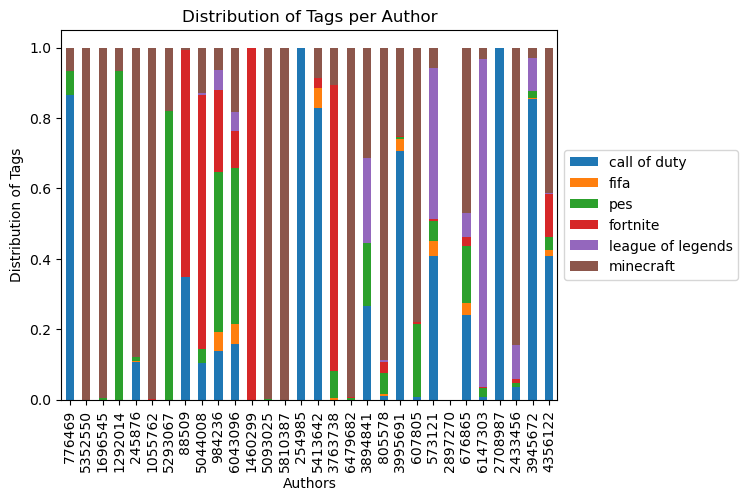

In [7]:

# Define the authors to count
authors = merged_commtags['author'].value_counts().head(30).index.tolist()
print(authors)

# Define colors for each category

# Create a dictionary to store the results
results = {}

# Loop through each category
for tag, color in tqdm(colors.items()):
    # Filter the data to keep only rows with the current category
    df = frames[tag]
    # Count the number of occurrences of each author
    counts = df['author'].value_counts()
    # Keep only the counts for the specified authors
    counts = counts.reindex(authors, fill_value=0)
    # Store the counts in the results dictionary
    results[tag] = counts



# Display the updated dataframe


# Create an empty dataframe to store the results
df = pd.DataFrame(columns=colors.keys(), index=authors)

# Loop through each author
for author in authors:
    # Loop through each category
    for tag in colors.keys():
        # Get the count for the current author and category
        count = results[tag][author]
        # Add the count to the dataframe
        df.at[author, tag] = count

# Display the dataframe
print(df)
# Loop through each row
for index, row in df.iterrows():
    # Divide each value in the row by the sum of the row
    row_sum = row.sum()
    df.loc[index] = row / row_sum

df.plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Authors')
plt.ylabel('Distribution of Tags')
plt.title('Distribution of Tags per Author')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



100%|██████████| 6/6 [00:00<00:00, 18.69it/s]


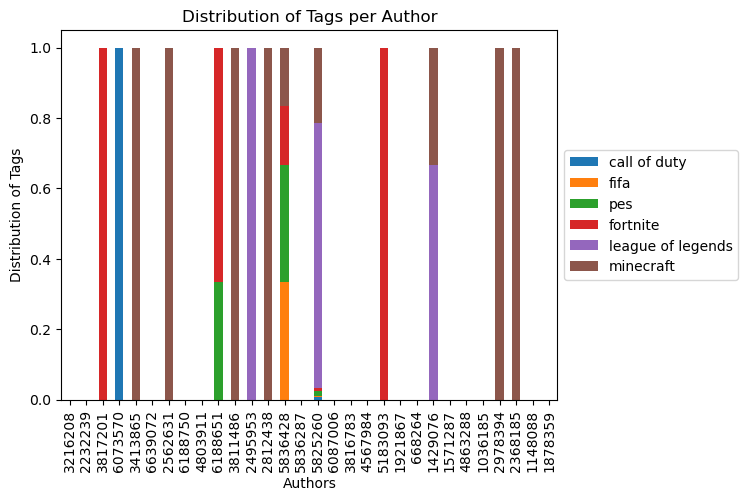

In [8]:
authors = list(merged_commtags['author'].unique())
random.shuffle(authors)
authors = authors[:30]

# Define colors for each category

# Create a dictionary to store the results
results = {}

# Loop through each category
for tag, color in tqdm(colors.items()):
    # Filter the data to keep only rows with the current category
    df = frames[tag]
    # Count the number of occurrences of each author
    counts = df['author'].value_counts()
    # Keep only the counts for the specified authors
    counts = counts.reindex(authors, fill_value=0)
    # Store the counts in the results dictionary
    results[tag] = counts



# Display the updated dataframe


# Create an empty dataframe to store the results
df = pd.DataFrame(columns=colors.keys(), index=authors)

# Loop through each author
for author in authors:
    # Loop through each category
    for tag in colors.keys():
        # Get the count for the current author and category
        count = results[tag][author]
        # Add the count to the dataframe
        df.at[author, tag] = count
df.head()
# Loop through each row
for index, row in df.iterrows():
    # Divide each value in the row by the sum of the row
    row_sum = row.sum()
    df.loc[index] = row / row_sum

df.plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Authors')
plt.ylabel('Distribution of Tags')
plt.title('Distribution of Tags per Author')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



Filtered data to keep only rows with "call of duty" in tags
Filtered data to keep only rows with "fifa" in tags
Filtered data to keep only rows with "pes" in tags
Filtered data to keep only rows with "fortnite" in tags
Filtered data to keep only rows with "league of legends" in tags
Filtered data to keep only rows with "minecraft" in tags


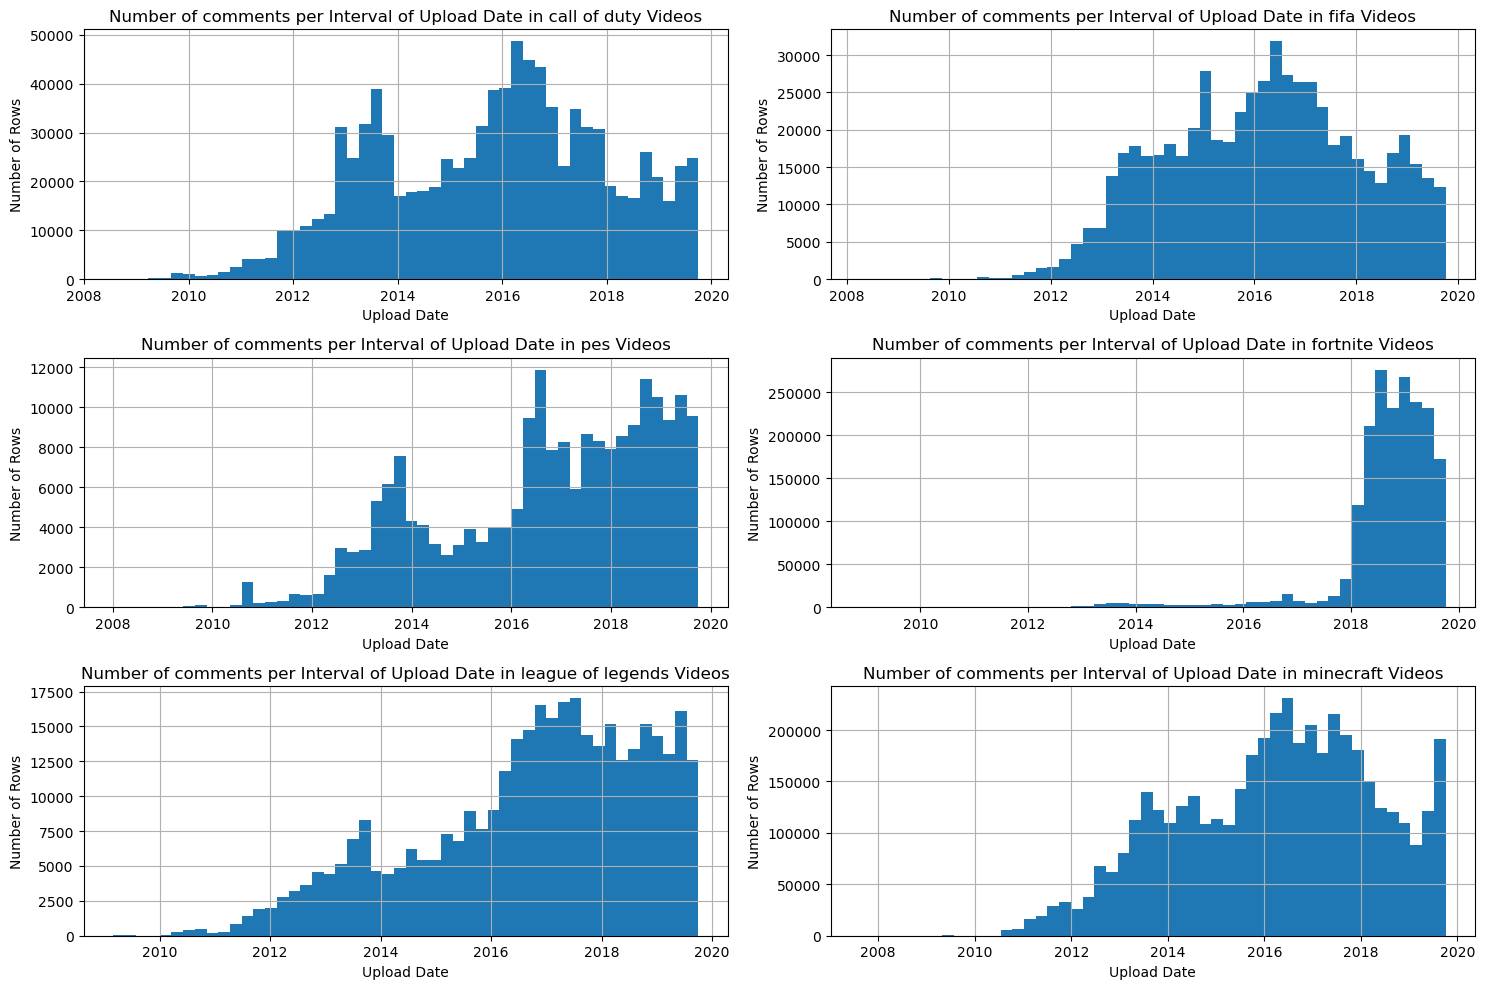

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Define the tags to plot
tags = ['call of duty', 'fifa', 'pes', 'fortnite', 'league of legends', 'minecraft']

# Loop through each tag and axis
for tag, ax in zip(tags, axes.flatten()):
    # Filter the data and plot the histogram
    a = merged_commtags[merged_commtags['tags'].str.contains(tag, case=False)]
    print(f'Filtered data to keep only rows with "{tag}" in tags')
    a = a.sort_values(by='upload_date')
    a['upload_date'] = pd.to_datetime(a['upload_date'])
    a.hist(column='upload_date', bins=50, figsize=(15, 10), ax=ax)
    ax.set_xlabel('Upload Date')
    ax.set_ylabel('Number of Rows')
    ax.set_title(f'Number of comments per Interval of Upload Date in {tag} Videos')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
tags_to_keep = ['call of duty', 'fifa', 'pes', 'fortnite', 'league of legends', 'minecraft']
df_filtered = merged_commtags[merged_commtags['tags'].isin(tags_to_keep)]
df_filtered

,author,display_id,likes,replies,tags,upload_date
16326,3831,EgyKvh-Xo1o,2,0,league of legends,2016-10-19 00:00:00
16364,3831,mPkG3lRvL8c,3,0,league of legends,2016-09-12 00:00:00
16378,3831,PnUiNgF838Q,0,0,league of legends,2016-09-06 00:00:00
35111,8417,Cu2UVaXHDLk,0,0,minecraft,2017-06-15 00:00:00
40964,9945,kC5ch2hBVxY,2,1,fortnite,2019-09-01 00:00:00
...,...,...,...,...,...,...
25453479,6639485,hv22B2C0V9M,0,0,league of legends,2013-04-18 00:00:00
25464200,6642489,uyLG-m3doq0,0,1,fortnite,2019-01-13 00:00:00
25469763,6643738,uyLG-m3doq0,0,0,fortnite,2019-01-13 00:00:00
25487606,6648284,PLs2dtLmtkE,1,0,minecraft,2019-09-09 00:00:00


In [11]:
import random

# Specify the number of random authors to keep
num_authors = 10

# Get a random sample of authors from the dataframe
random_authors = random.sample(merged_commtags['author'].unique().tolist(), num_authors)

# Filter the dataframe to keep only the comments for the random authors
df_filtered = merged_commtags[merged_commtags['author'].isin(random_authors)]

# Display the filtered dataframe
df_filtered


,author,display_id,likes,replies,tags,upload_date
8568639,2225993,YduZqu3QpSw,0,0,"SATIRE,lil,tay,lil tay,pewdiepie,pewdie,pdp,pewds",2018-06-14 00:00:00
11093090,2879811,91BVjRUDlWk,0,0,"five nights at freddys,five nights at freddys ...",2016-07-01 00:00:00
11833462,3069207,ykCcPq7XX4w,0,0,"GTA 5,GTA 5 Online,GTA V,GTA Online,GTA V Onli...",2017-01-13 00:00:00
12322676,3198677,jVsXX-tCsis,1,0,"tfue world cup,fortnite,fortnite world cup,tfu...",2019-05-28 00:00:00
12322677,3198677,jVsXX-tCsis,1,0,"tfue world cup,fortnite,fortnite world cup,tfu...",2019-05-28 00:00:00
12322678,3198677,WR9t7NyRbYs,1,0,"روكيز,ابيك روكيز,EpicRockyz,ضحك,daepicrockyz,م...",2019-04-26 00:00:00
12322679,3198677,jVsXX-tCsis,1,0,"tfue world cup,fortnite,fortnite world cup,tfu...",2019-05-28 00:00:00
14828362,3856118,-mi0WXQTNic,0,0,"Y'ALL THOUGHT I WAS CRAZY!!!,Kingdom Hearts X ...",2016-11-22 00:00:00
14828363,3856118,B7eklyB25sU,0,0,"Kira,Dio,Jojo's Bizarre Adventure,Eyes of Heaven",2016-07-18 00:00:00
14828364,3856118,uEwnbqF6zjM,0,0,"Naruto Shippuden Ultimate Ninja Storm 4,naruto...",2015-08-06 00:00:00


In [12]:
tags_to_check = ['call of duty', 'fifa', 'grand theft auto', 'fortnite', 'league of legends', 'minecraft']
merged_commtags['contains_tag'] = merged_commtags['tags'].str.contains('|'.join(tags_to_check), case=False)
merged_commtags.head()


,author,display_id,likes,replies,tags,upload_date,contains_tag
0,2,9pQILRT42Cg,0,0,"faze,fazeclan,banks,faze banks,my new girlfrie...",2017-06-22 00:00:00,False
1,2,PWWRzCyuiFU,0,0,,2018-06-03 00:00:00,False
2,5,9MuGpmXGlsY,0,0,"fortnite,fortnite gameplay,fortnite gotta chil...",2019-07-13 00:00:00,True
3,5,UvZPbfUkMGw,0,0,"fortnite,fortnite top 10,top 10 crazy ways peo...",2019-06-17 00:00:00,True
4,11,qj9sjQjQ19M,0,0,"مقلب ببجي,ببجي موبايل,pubg mobile,مقلب ببجي مو...",2019-02-22 00:00:00,False


In [13]:
merged_commtags_filtered = merged_commtags[merged_commtags['contains_tag'] == True]
merged_commtags_filtered


,author,display_id,likes,replies,tags,upload_date,contains_tag
2,5,9MuGpmXGlsY,0,0,"fortnite,fortnite gameplay,fortnite gotta chil...",2019-07-13 00:00:00,True
3,5,UvZPbfUkMGw,0,0,"fortnite,fortnite top 10,top 10 crazy ways peo...",2019-06-17 00:00:00,True
5,16,64yHcPF5EtQ,0,0,"minecraft,challenge,mini-games,mini games,mods...",2018-08-30 00:00:00,True
8,16,VAU-L2oIBds,0,0,"Denis,Denis YouTube,YouTube Denis,Denis The Pa...",2017-10-08 00:00:00,True
10,16,-LqKw4w1dPI,1,0,"Valkyrae,rae,val,valky,twitch,twitch streamer,...",2019-02-01 00:00:00,True
...,...,...,...,...,...,...,...
25658684,6695123,dJNxzRRgRSc,1,0,"GTA 5,GTA V,GTA5,Grand Theft Auto 5,PS4,Next G...",2014-12-16 00:00:00,True
25658685,6695123,dJNxzRRgRSc,0,0,"GTA 5,GTA V,GTA5,Grand Theft Auto 5,PS4,Next G...",2014-12-16 00:00:00,True
25658686,6695123,dJNxzRRgRSc,1,0,"GTA 5,GTA V,GTA5,Grand Theft Auto 5,PS4,Next G...",2014-12-16 00:00:00,True
25658687,6695123,Qv5r_nEwcEY,0,0,"gta 5 funny moments,gta v funny moments,gta 5 ...",2016-09-02 00:00:00,True


In [14]:
merged_commtags_filtered = merged_commtags_filtered.sort_values(by='upload_date')
upload_dates = merged_commtags_filtered['upload_date'].unique()

dates_dict = {date: [] for date in upload_dates}
dates_dict


{'2007-08-16 00:00:00': [],
 '2008-04-04 00:00:00': [],
 '2008-04-15 00:00:00': [],
 '2008-05-14 00:00:00': [],
 '2008-06-14 00:00:00': [],
 '2008-06-19 00:00:00': [],
 '2008-06-26 00:00:00': [],
 '2008-06-29 00:00:00': [],
 '2008-07-13 00:00:00': [],
 '2008-07-20 00:00:00': [],
 '2008-07-25 00:00:00': [],
 '2008-08-05 00:00:00': [],
 '2008-08-15 00:00:00': [],
 '2008-08-23 00:00:00': [],
 '2008-09-01 00:00:00': [],
 '2008-09-16 00:00:00': [],
 '2008-09-22 00:00:00': [],
 '2008-09-23 00:00:00': [],
 '2008-09-26 00:00:00': [],
 '2008-10-11 00:00:00': [],
 '2008-10-28 00:00:00': [],
 '2008-11-03 00:00:00': [],
 '2008-11-18 00:00:00': [],
 '2008-11-19 00:00:00': [],
 '2008-11-30 00:00:00': [],
 '2008-12-05 00:00:00': [],
 '2008-12-11 00:00:00': [],
 '2008-12-15 00:00:00': [],
 '2008-12-18 00:00:00': [],
 '2008-12-20 00:00:00': [],
 '2008-12-21 00:00:00': [],
 '2008-12-23 00:00:00': [],
 '2008-12-25 00:00:00': [],
 '2008-12-26 00:00:00': [],
 '2008-12-28 00:00:00': [],
 '2008-12-29 00:00:0

In [15]:
uniqueauth = merged_commtags_filtered['author'].unique()
author_dict = {author: None for author in uniqueauth}
(author_dict)

{5556687: None,
 2736890: None,
 4058985: None,
 2316745: None,
 4675447: None,
 3698812: None,
 1196327: None,
 5607859: None,
 2963482: None,
 6443404: None,
 808212: None,
 168229: None,
 4166251: None,
 566479: None,
 1529116: None,
 455560: None,
 4622284: None,
 3503212: None,
 4527839: None,
 3545122: None,
 4372547: None,
 4875356: None,
 4935944: None,
 2060150: None,
 4040541: None,
 5499570: None,
 6658398: None,
 5122216: None,
 1946045: None,
 2496751: None,
 2125097: None,
 1616973: None,
 1143352: None,
 5477006: None,
 5138818: None,
 3403148: None,
 3934034: None,
 4667125: None,
 1593029: None,
 1863387: None,
 4302562: None,
 4837228: None,
 2588067: None,
 1588723: None,
 5894646: None,
 6258534: None,
 470214: None,
 1595294: None,
 873384: None,
 5169264: None,
 6233591: None,
 1751944: None,
 4963713: None,
 3969874: None,
 6075687: None,
 6635513: None,
 4180669: None,
 4959420: None,
 414687: None,
 5781257: None,
 1495978: None,
 2736359: None,
 5086492: None,

In [16]:
merged_commtags_filtered = merged_commtags_filtered.sort_values(by='upload_date')
merged_commtags_filtered

,author,display_id,likes,replies,tags,upload_date,contains_tag
21379144,5556687,-Z70082BOVU,0,0,"episode,swords misadventures,*video annotation...",2007-08-16 00:00:00,True
10556000,2736890,-Z70082BOVU,0,0,"episode,swords misadventures,*video annotation...",2007-08-16 00:00:00,True
15600478,4058985,-Z70082BOVU,0,0,"episode,swords misadventures,*video annotation...",2007-08-16 00:00:00,True
8912709,2316745,-Z70082BOVU,0,0,"episode,swords misadventures,*video annotation...",2007-08-16 00:00:00,True
8912627,2316745,-Z70082BOVU,0,0,"episode,swords misadventures,*video annotation...",2007-08-16 00:00:00,True
...,...,...,...,...,...,...,...
12411155,3221315,EVFiyzRRO5Q,1,0,"#minecraft,#games,#minecraftindonesia,#mcpe,#m...",2019-10-03 00:00:00,True
14512830,3772092,CPlvfMDUPwI,2,0,"optic,gaming,nation,opticgaming,opticnation,op...",2019-10-03 00:00:00,True
5869075,1521223,aTSAXgKe4GE,0,0,"funny gaming,gameplay,funny video,gaming,funny...",2019-10-03 00:00:00,True
7526727,1954713,di6TbFuCGpI,0,0,"Handcam,Claw Handcam,Hand Cam,Controller Cam,H...",2019-10-03 00:00:00,True


In [17]:
from bokeh.io import show
from bokeh.models import DatePicker

date_picker = DatePicker(title="Select a date:", min_date='2022-01-01', max_date='2023-12-31')

show(date_picker)

In [18]:
# Iterate over each row in merged_commtags_filtered
for index, row in tqdm(merged_commtags_filtered.iterrows()):
    # Get the tags of the current author
    author_tags = row['tags']
    
    # Iterate over each tag in tags
    for tag in tags_to_check:
        # Check if the current tag is in the author_tags
        if tag in author_tags:
            # Perform your desired action here
            if author_dict[row['author']] == None:
                author_dict[row['author']] = tag
            elif author_dict[row['author']]!=tag:
                dates_dict[row['upload_date']].append((author_dict[row['author']],tag))
                author_dict[row['author']] = tag

dates_dict              
                



8595292it [05:39, 25301.37it/s]


{'2007-08-16 00:00:00': [],
 '2008-04-04 00:00:00': [],
 '2008-04-15 00:00:00': [],
 '2008-05-14 00:00:00': [],
 '2008-06-14 00:00:00': [],
 '2008-06-19 00:00:00': [],
 '2008-06-26 00:00:00': [],
 '2008-06-29 00:00:00': [('minecraft', 'grand theft auto')],
 '2008-07-13 00:00:00': [('grand theft auto', 'minecraft')],
 '2008-07-20 00:00:00': [],
 '2008-07-25 00:00:00': [],
 '2008-08-05 00:00:00': [],
 '2008-08-15 00:00:00': [],
 '2008-08-23 00:00:00': [],
 '2008-09-01 00:00:00': [],
 '2008-09-16 00:00:00': [('grand theft auto', 'minecraft')],
 '2008-09-22 00:00:00': [],
 '2008-09-23 00:00:00': [],
 '2008-09-26 00:00:00': [],
 '2008-10-11 00:00:00': [],
 '2008-10-28 00:00:00': [],
 '2008-11-03 00:00:00': [],
 '2008-11-18 00:00:00': [],
 '2008-11-19 00:00:00': [],
 '2008-11-30 00:00:00': [],
 '2008-12-05 00:00:00': [],
 '2008-12-11 00:00:00': [],
 '2008-12-15 00:00:00': [],
 '2008-12-18 00:00:00': [],
 '2008-12-20 00:00:00': [],
 '2008-12-21 00:00:00': [],
 '2008-12-23 00:00:00': [],
 '200

In [19]:
import networkx as nx
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt
from collections import Counter

dates_list = list(dates_dict.keys())
dates_list.sort()  # Sorting the list of dates

# Create a directed graph
@interact(date=IntSlider(min=0, max=len(dates_list)-1, step=1))
def draw_graph(date):
    selected_date = dates_list[date]
    G = nx.DiGraph()

    # Clear the graph
    G.clear()

    # Get the tag tuples for the selected date and count the occurrences
    tag_tuples = Counter(dates_dict[selected_date])

    # Add nodes for each tag
    G.add_nodes_from(tags_to_check)

    # Add edges with weights (occurrences)
    for (tag1, tag2), weight in tag_tuples.items():
        G.add_edge(tag1, tag2, weight=weight)

    # Define node and edge aesthetics
    node_color = 'lightblue'
    node_size = 500
    font_size = 10

    # Edge thickness based on weight
    edge_width = [G[u][v]['weight'] for u, v in G.edges()]

    # Scale the arrow size and set a max size
    scaling_factor = 0.1  # Adjust this factor as needed
    max_arrow_size = 20   # Maximum arrow size
    arrow_size = [min(scaling_factor * weight, max_arrow_size) for weight in edge_width]

    # Draw the graph
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=node_size, 
            font_size=font_size, width=edge_width, edge_color='grey', arrowsize=arrow_size)
    
    plt.title(f"Graph for Upload Date: {selected_date}")
    plt.show()
    plt.clf()


interactive(children=(IntSlider(value=0, description='date', max=3742), Output()), _dom_classes=('widget-inter…

In [20]:
import networkx as nx
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

# Create an empty graph
# Your dates_dict and tags_to_check should be defined here

# Get unique dates from dates_dict
dates_list = list(dates_dict.keys())
dates_list.sort()  # Sorting the list of dates

@interact(date=IntSlider(min=0, max=len(dates_list)-1, step=1))
def draw_graph(date):
    selected_date = dates_list[date]
    G = nx.Graph()

    # Clear the graph
    G.clear()
    
    # Get the tag tuples for the selected date
    tag_tuples = dates_dict[selected_date]
    
    # Add nodes for each tag
    G.add_nodes_from(tags_to_check)
    
    # Iterate over each tuple in tag_tuples
    for tag_tuple in tag_tuples:
        tag1, tag2 = tag_tuple
        # Add an edge between the tags
        G.add_edge(tag1, tag2)

    # Draw the graph
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    plt.title(f"Graph for Upload Date: {selected_date}")
    plt.show()
    plt.clf()  # Clear the figure for the next iteration


interactive(children=(IntSlider(value=0, description='date', max=3742), Output()), _dom_classes=('widget-inter…

In [21]:
import networkx as nx
from ipywidgets import interact
import matplotlib.pyplot as plt
# Create an empty graph

# Iterate over each upload date in dates_dict
@interact(date=list(dates_dict.keys()))
def draw_graph(date):
    G = nx.Graph()

    # Clear the graph
    G.clear()
    
    # Get the tag tuples for the selected date
    tag_tuples = dates_dict[date]
    
    # Add nodes for each tag
    G.add_nodes_from(tags_to_check)
    
    # Iterate over each tuple in tag_tuples
    for tag_tuple in tag_tuples:
        tag1, tag2 = tag_tuple
        # Add an edge between the tags
        G.add_edge(tag1, tag2)

    # Draw the graph
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    plt.title(f"Graph for Upload Date: {date}")
    plt.show()
    plt.clf()  # Clear the figure for the next iteration


interactive(children=(Dropdown(description='date', options=('2007-08-16 00:00:00', '2008-04-04 00:00:00', '200…

In [22]:
author_name = 6695100  # Replace 'John Doe' with the actual author's name

df_filtered = merged_commtags_filtered[merged_commtags_filtered['author'] == author_name]
df_filtered


,author,display_id,likes,replies,tags,upload_date,contains_tag
25658642,6695100,AinJbYHmnJo,0,0,"modern warfare 4,ghosts 2,call of duty ghosts ...",2016-03-02 00:00:00,True
25658646,6695100,UOOVBatsYzY,1,0,"Call Of Duty Black Ops 3,black ops 3,call of d...",2016-03-27 00:00:00,True
25658639,6695100,GY4cFGgD7U0,0,0,"call of duty,cod,cod black ops 2,call,of,duty,...",2016-03-30 00:00:00,True
25658649,6695100,2mIlFC52bqc,0,0,"call of duty,activision,arma legendaria,legend...",2016-12-27 00:00:00,True
25658650,6695100,6nOvCwA1RrQ,0,0,"skate 3,walkthrough,gameplay,gaming,skate 4,EA...",2017-01-05 00:00:00,True
25658640,6695100,7_37rPzUb8k,0,0,"Football,Soccer,football challenge,soccer chal...",2017-01-12 00:00:00,True
25658655,6695100,B6TU38E5_rs,1,0,"2b2t,2builders2tools,2b2t.org,2b2torg,anarchy,...",2018-08-11 00:00:00,True
25658665,6695100,A43CMxtXpDg,0,1,"fortnite,fortnite game,fortnite weird,pussy,pu...",2019-05-05 00:00:00,True
25658667,6695100,ZHsKKzmQTHg,0,0,"CallMeCarson,minecraft,CallmeCarson minecraft,...",2019-07-23 00:00:00,True


C:\Users\15712\AppData\Local\Temp\ipykernel_36264\2402875756.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['upload_date'] = pd.to_datetime(filtered_data['upload_date'])
C:\Users\15712\AppData\Local\Temp\ipykernel_36264\2402875756.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['upload_date'] = pd.to_datetime(filtered_data['upload_date'])
C:\Users\15712\AppData\Local\Temp\ipykernel_36264\2402875756.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

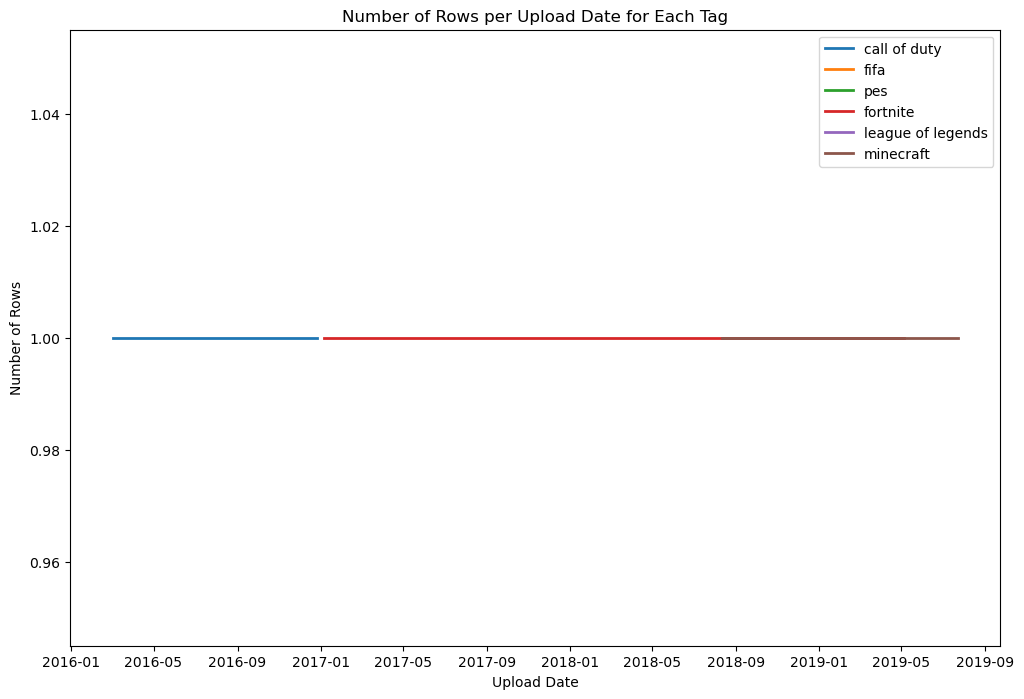

In [23]:
import matplotlib.pyplot as plt

# Define the tags to plot

# Create a figure and axes with a larger size
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each tag
for tag in tags:
    # Filter the data for the current tag
    filtered_data = df_filtered[df_filtered['tags'].str.contains(tag, case=False)]
    
    # Convert the upload date to datetime
    filtered_data['upload_date'] = pd.to_datetime(filtered_data['upload_date'])
    
    # Group the data by upload date and count the number of rows
    grouped_data = filtered_data.groupby('upload_date').size()
    
    # Plot the curve with a thinner line width
    ax.plot(grouped_data.index, grouped_data.values, label=tag, linewidth=2)
    
    # Add scatter points to the plot

# Set the x-axis label
ax.set_xlabel('Upload Date')

# Set the y-axis label
ax.set_ylabel('Number of Rows')

# Set the title
ax.set_title('Number of Rows per Upload Date for Each Tag')

# Add a legend
ax.legend()

# Show the plot
plt.show()
